In [2]:
# List serial devices
!ls -l /dev/ttyA*

crw-rw---- 1 root dialout 166, 1 Aug 20 17:06 /dev/ttyACM1


In [2]:
# import serial
# port = "/dev/ttyACM2"
# baudrate = 115200
# serial_connection = serial.Serial(port, baudrate)

# # Read and write data until the transfer is complete
# while True:
#     data = serial_connection.read(128)
#     if data == b"EOF":
#         break
#     print(data)

# # Close the files and serial connection
# serial_connection.close()

In [3]:
import serial
import time
import numpy as np
import matplotlib.pyplot as plt

# Open the serial connection to the MicroPython device
ser = serial.Serial('/dev/ttyACM1', 115200, timeout=1,  parity=serial.PARITY_EVEN, stopbits=serial.STOPBITS_ONE)
ser.flush()
time.sleep(0.5)  # Wait for the connection to establish

In [4]:

def send_command(pos1, pos2, debug=False):
    command = f"MOVE,{pos1},{pos2}\n"
    if debug: print(f"Sending command: {command.strip()}")  # Debug: Print the command being sent
    time.sleep(0.1)
    ser.write(command.encode('utf-8'))
    time.sleep(0.2)
    # response = ser.readline().strip().decode('utf-8')
    response = ser.read_until().strip().decode('utf-8')
    if debug: print(f"Received response: {response}")  # Debug: Print the received response
    return response

# Define grid parameters
# pos1_range = np.linspace(4000, 6000, 32)  # Servo 1 positions
# pos2_range = np.linspace(3000, 6000, 32)  # Servo 2 positions

# pos1_range = np.linspace(4500, 5500, 16)  # Servo 1 positions
# pos2_range = np.linspace(4250, 4750, 16)  # Servo 2 positions

pos1_range = np.linspace(4500, 5500, 100)  # Servo 1 positions
pos2_range = np.linspace(3900, 4500, 60)  # Servo 2 positions

ldr_readings = np.zeros((len(pos1_range), len(pos2_range)))

# Perform grid scan
for i, pos1 in enumerate(pos1_range):
    for j, pos2 in enumerate(pos2_range):
        ldr_reading = send_command(int(pos1), int(pos2), debug=j==0)
        if ldr_reading is not None:
            try:
                ldr_readings[i, j] = float(ldr_reading)
            except Exception as e:
                print(f"Error converting LDR reading to float: {e}")
                print(f"LDR reading: {ldr_reading}")
                ldr_readings[i, j] = 0
        time.sleep(0.1)  # Add delay to avoid overwhelming the serial communication


Sending command: MOVE,4500,3900
Received response: 43530
Sending command: MOVE,4510,3900
Received response: 29879
Sending command: MOVE,4520,3900
Received response: 32279
Sending command: MOVE,4530,3900
Received response: 29527
Sending command: MOVE,4540,3900
Received response: 30455
Sending command: MOVE,4550,3900
Received response: 28887
Sending command: MOVE,4560,3900
Received response: 31303
Sending command: MOVE,4570,3900
Received response: 28006
Sending command: MOVE,4580,3900
Received response: 29719
Sending command: MOVE,4590,3900
Received response: 27862
Sending command: MOVE,4601,3900
Received response: 28166
Sending command: MOVE,4611,3900
Received response: 29351
Sending command: MOVE,4621,3900
Received response: 27094
Sending command: MOVE,4631,3900
Received response: 26294
Sending command: MOVE,4641,3900
Received response: 25222
Sending command: MOVE,4651,3900
Received response: 26134
Sending command: MOVE,4661,3900
Received response: 25094
Sending command: MOVE,4671,3900

KeyboardInterrupt: 

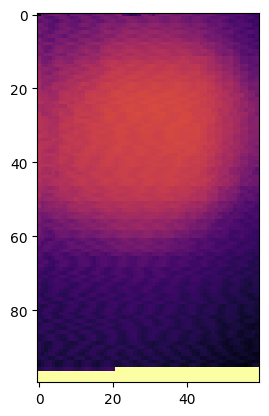

In [5]:
img = ldr_readings - np.min(ldr_readings)
img = img / np.max(img)
img = 1-img
# Rotate 90 degrees
# img = np.rot90(img)
plt.imshow(img, cmap='inferno')

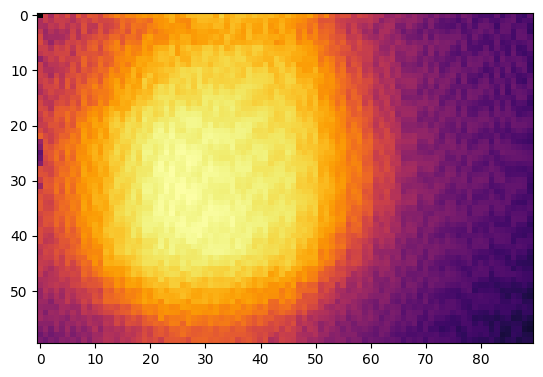

In [6]:
plt.imshow(img.T[:, :90], cmap='inferno')

In [7]:
# import pickle
# pickle.dump(img.T[:, :90], open('img.pkl', 'wb'))

In [8]:
# Close the serial connection
ser.close()